# Assignment


You have already picked out the dataset you want to work with. 

----

# Question 
1. EDA, i want to see some insights, present it neatly. 
2. Fit a Decision Tree Regressor model on your data. 
3. I want to see the training and testing accuracy of your model. So do split your data before modelling.


### Brownie Points (Extra 15 points)
- Lastly, i want to see a function where i can input my values and get a prediction of whatever you are trying to predict. Think this through !!.



Best of luck !!

![](https://media.tenor.com/mUVjXo5LhsQAAAAC/kakashi-yes.gif)


# ----------------------------------------------------------------------------------------------------------

# Here we go!!


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("C:/Users/akank/Downloads/Business analytics/melb_data.csv")

In [5]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0



# Exploratory Data Analysis


In [6]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


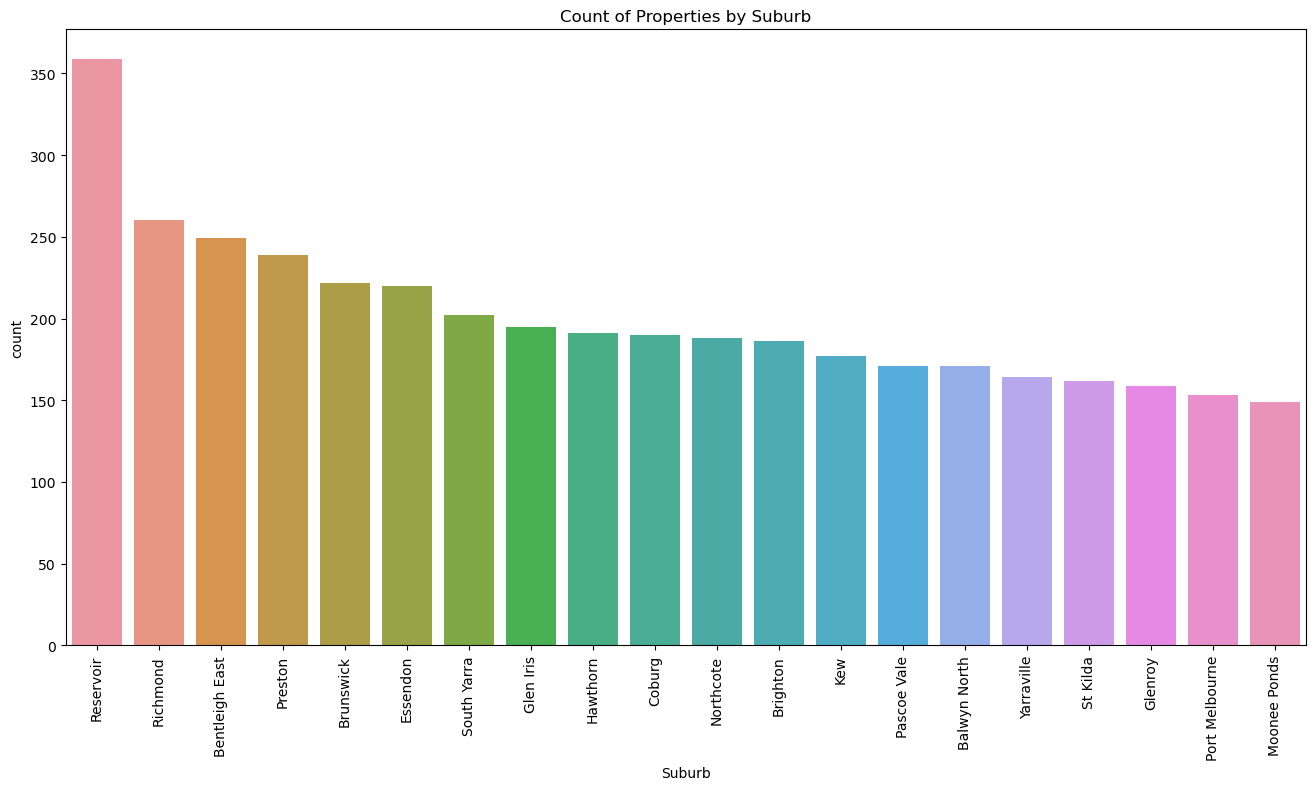

In [7]:
plt.figure(figsize=(16, 8))
sns.countplot(x='Suburb', data=df, order=df['Suburb'].value_counts().iloc[:20].index)
plt.xticks(rotation=90)
plt.title("Count of Properties by Suburb")
plt.show()

## Bar Plot:

The suburb of Reservoir has the most number of properties in the dataset, followed by Bentleigh East, Richmond and Preston. Most suburbs have less than 1000 properties in the dataset, with only a few suburbs having more than 2000 properties.

The number of properties in a suburb may be an indicator of the demand and popularity of that area, which may influence property prices and availability.

Text(0.5, 1.0, 'Distribution of Price by Property Type')

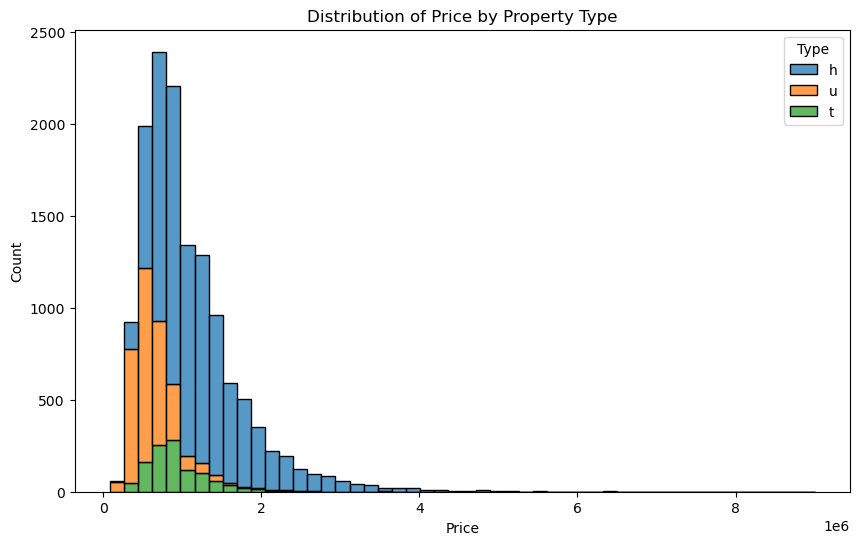

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df, x='Price', hue='Type', multiple='stack', bins=50)
plt.title("Distribution of Price by Property Type")

## Histogram:

 Houses are the most expensive property type on average, followed by townhouses and units.
The distribution of prices for each property type is heavily right-skewed, with most properties having a price of less than $2 million.

The type of property may be an important factor in determining its value, with houses likely to command higher prices than units or townhouses.

Text(0.5, 1.0, 'Correlation between Price and Property Attributes')

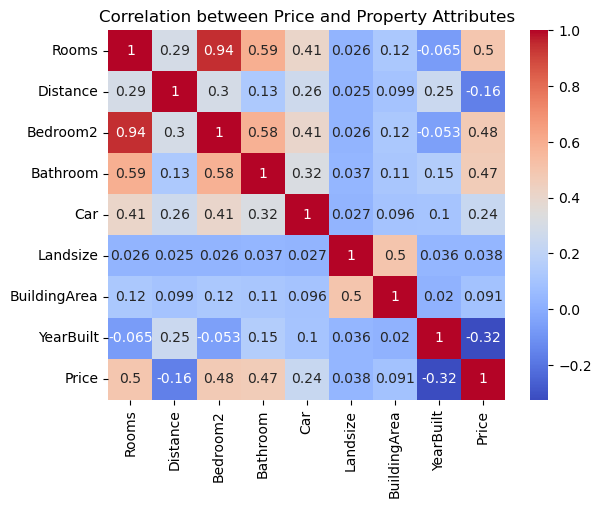

In [9]:
corr = df[['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Price']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation between Price and Property Attributes")


## Heat Map:

Price has the strongest positive correlation with number of rooms, number of bedrooms, number of bathrooms, and building area.
Price has a weak negative correlation with distance from the CBD and year built.
Landsize and number of car spaces have weak correlations with price.

The number of rooms, bedrooms, and bathrooms, as well as the size of the building area, may be important factors in determining a property's price.
The age of the property and its distance from the CBD may also have an impact on its value.

Text(0.5, 1.0, 'Price Distribution by Region and Property Type')

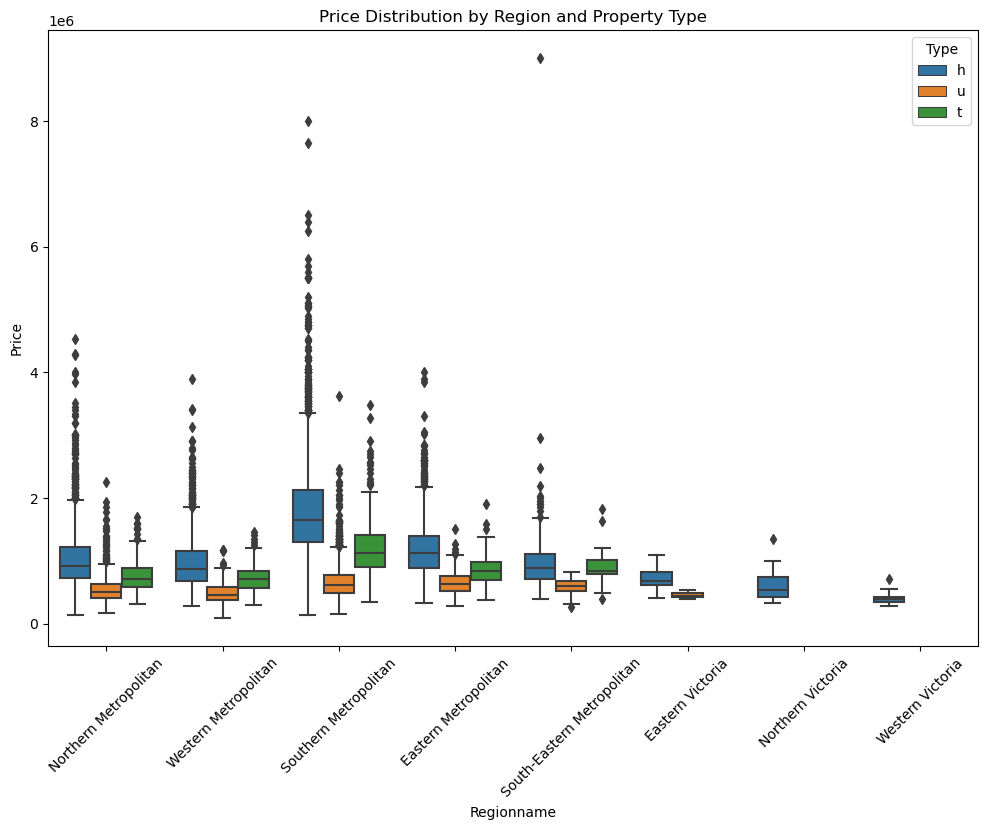

In [10]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Regionname', y='Price', hue='Type', data=df)
plt.xticks(rotation=45)
plt.title("Price Distribution by Region and Property Type")

## Box plot:

Houses are the most expensive property type in all regions.
Southern Metropolitan and Eastern Metropolitan regions have the highest median prices for all property types, while Western Metropolitan and Northern Victoria regions have the lowest median prices.
All regions have a wide range of prices and many outliers for all property types.

The region where a property is located may be an important factor in its value, and this may vary depending on the type of property.

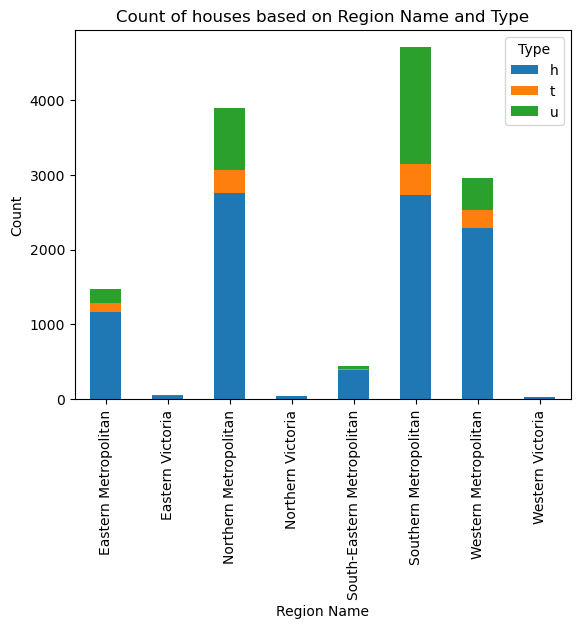

In [11]:
region_type_count = df.groupby(['Regionname', 'Type']).size().unstack()
region_type_count.plot(kind='bar', stacked=True)
plt.xlabel('Region Name')
plt.ylabel('Count')
plt.title('Count of houses based on Region Name and Type')
plt.show()

## bar graph:

we can see that the most common property types are houses and flats/apartments. Houses are most common in the Eastern suburbs and flats/apartments are most common in the Southern suburbs.
One interesting observation is that townhouses are more popular in the Northern and Western suburbs compared to the other regions. This could be because these areas are more densely populated and townhouses provide a more space-efficient living option.

Based on this observation, we can predict that the demand for townhouses may continue to increase in these regions as the population density continues to grow.

Another prediction we can make is that the demand for houses may continue to decrease in the Southern suburbs as the cost of living in these areas increases and the availability of land for new housing developments decreases. This could result in a shift towards more high-density living options such as flats/apartments and townhouses in these regions.

Text(0.5, 1.0, 'Count of Properties by Method')

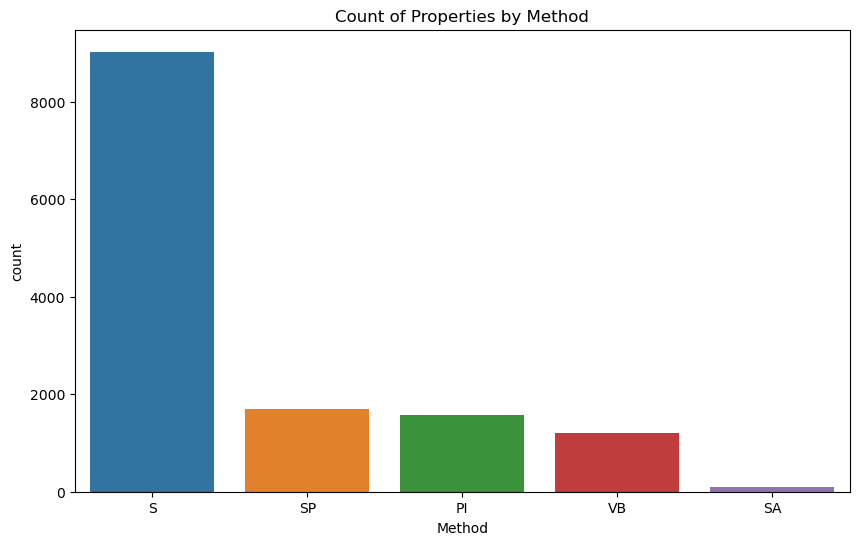

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Method', data=df, order=df['Method'].value_counts().index)
plt.title("Count of Properties by Method")

## Bar Plot:

Most properties in the dataset were sold by Private Treaty or S via PI (Sold after auction price not disclosed).
Very few properties were sold through Auction, VB (Vendor Bid), or W (Withdrawn).
Only a small proportion of properties were sold through SA (Sold after auction), SS (Sold before auction), or PN (Passed in).

The method used to sell a property may have an impact on its price and availability. 

Text(0.5, 1.0, 'Average Price of Properties by YearBuilt')

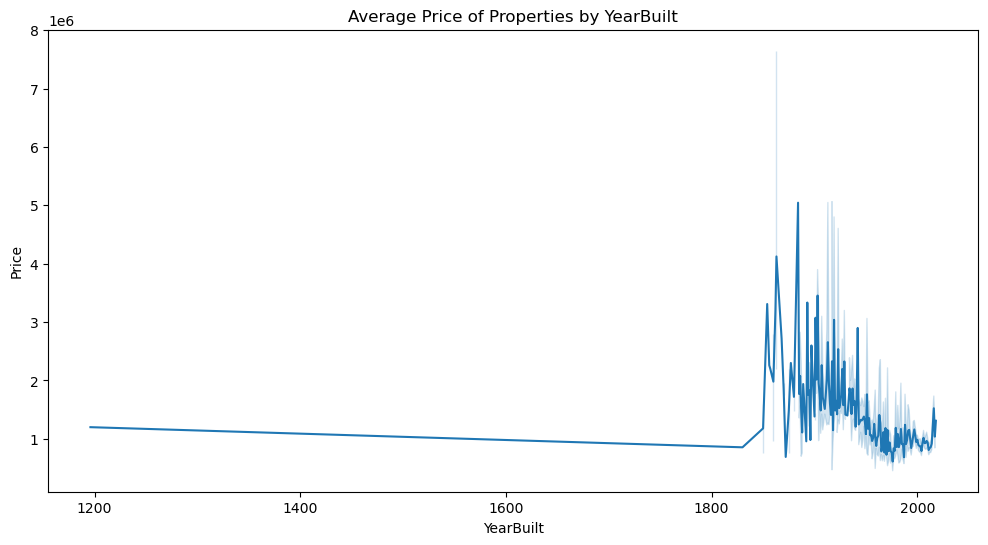

In [13]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='YearBuilt', y='Price', data=df)
plt.title('Average Price of Properties by YearBuilt')
plt.title ("Average Price of Properties by YearBuilt")

## Line plot:

The average price of properties in Melbourne generally increases with the year of construction.
Properties built before 1900 and after 2000 have a higher average price than those built in the early 1900s to 2000.
The average price of properties built between 1910-1940 and 1980-1990 is lower than that of the other time periods.

The age of a property is an important factor in determining its value, with newer and older properties tending to have a higher value than those built in the mid-1900s.
The increase in average property prices over the years suggests that the demand for housing in Melbourne has been steadily increasing.

Text(0, 0.5, 'Distance')

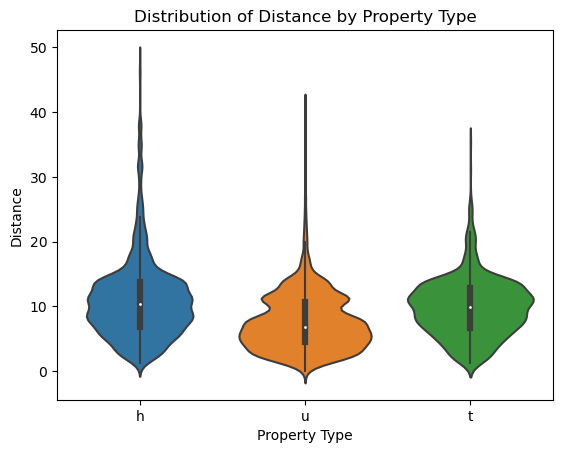

In [14]:
sns.violinplot(x='Type', y='Distance', data=df)
plt.title('Distribution of Distance by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Distance')

## Violin plot:

The median distance from the central business district for houses is higher than for townhouses and units, and that the distribution of distances for houses is wider than for townhouses and units.

Houses that are farther from the central business district may be more affordable, but may also have fewer amenities nearby. This could make them more attractive to buyers who are willing to trade off convenience for affordability.

Text(0.5, 1.0, 'Property Type Distribution')

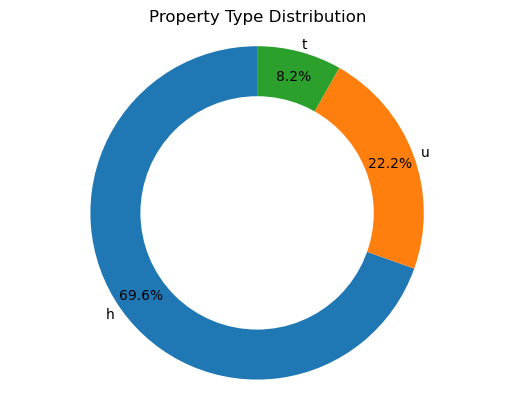

In [15]:
type_count = df['Type'].value_counts()
plt.pie(type_count, labels=type_count.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, labeldistance=1.05)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title('Property Type Distribution')

## Donut Chart:

The distribution of property types in the dataset. The three types of properties are house, townhouse, and unit. From the chart, we can see that the most common type of property is a house, followed by a unit and a townhouse.

The high proportion of houses suggests that houses are the most preferred type of property for buyers. Therefore, we can expect a higher demand for houses in the market, which may lead to an increase in the prices of houses compared to townhouses and units.

Furthermore, if we observe a decreasing trend in the number of houses being sold in the future, it could indicate a shift in buyer preferences towards townhouses or units. This could also mean a decrease in the demand for houses and a possible decrease in the prices of houses.

Additionally, understanding the distribution of property types can also help real estate agents and property developers to make informed decisions on which types of properties to focus on in a particular area. For instance, if the data shows a high demand for townhouses in a particular region, property developers could focus on building more townhouses in that area to meet the demand.

Overall, the pie chart provides a quick and easy-to-understand representation of the distribution of property types in the dataset

Text(0, 0.5, 'Price')

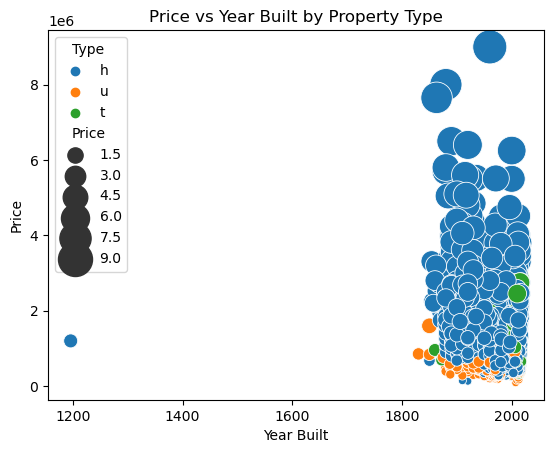

In [16]:
sns.scatterplot(data=df, x='YearBuilt', y='Price', hue='Type', size='Price', sizes=(30, 600))
plt.title('Price vs Year Built by Property Type')
plt.xlabel('Year Built')
plt.ylabel('Price')

## Scatter Plot:

The relationship between the year the property was built and its price, with points colored by property type. The plot reveals that older properties tend to have lower prices, and that different property types have different price-year built relationships.

Real estate agents can use this information to advise customers on the expected price range of their property based on its age and property type. Developers can also use this information to focus on building properties that are more likely to command higher prices based on their type and age.

In [17]:
from wordcloud import WordCloud  

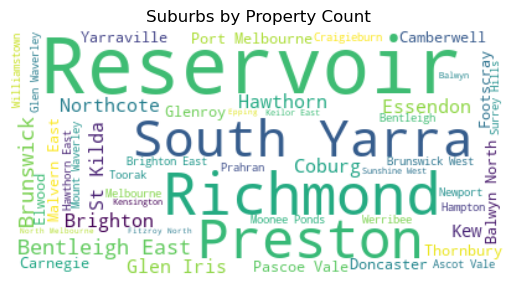

In [18]:
wordcloud = WordCloud(background_color='white', max_words=50, contour_width=4, contour_color='steelblue')
wordcloud.generate_from_frequencies(df.groupby('Suburb')['Propertycount'].sum().sort_values(ascending=False).to_dict())
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Suburbs by Property Count')
plt.show()


## Wordcloud:

The most common suburbs in the dataset, with the size of each word indicating the number of properties in that suburb. The plot reveals that the suburb with the most properties in the dataset is Reservoir.

Developers can use this information to focus on building more properties in suburbs that have high demand for real estate.

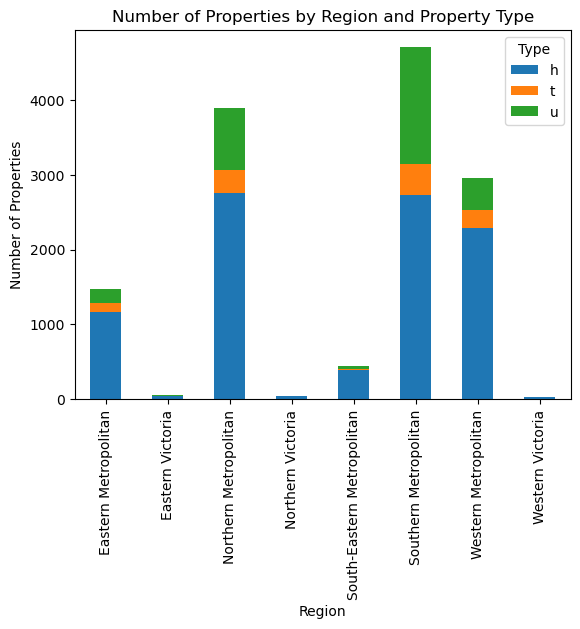

In [19]:
df.groupby(['Regionname', 'Type']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Number of Properties by Region and Property Type')
plt.xlabel('Region')
plt.ylabel('Number of Properties')
plt.show()

## stacked bar graph:

The number of houses is highest in the Northern Metropolitan region, while the number of units is highest in the Southern Metropolitan region. The Eastern Metropolitan and Western Metropolitan regions have more townhouses than other property types.

This information could be useful for developers looking to build new properties in a particular region. For example, if there is high demand for houses in the Northern Metropolitan region, developers may want to focus on building more houses in that area.

Text(0, 0.5, 'Price')

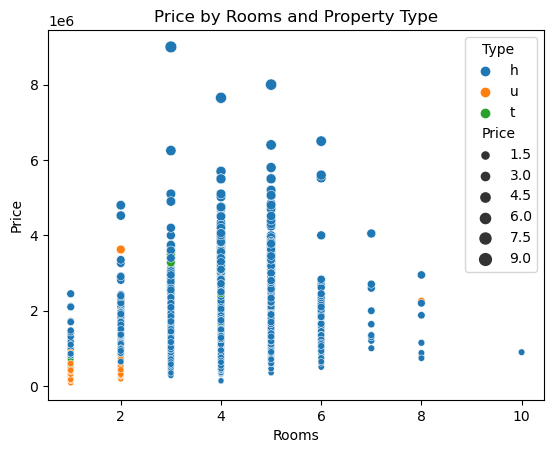

In [20]:
sns.scatterplot(x='Rooms', y='Price', hue='Type', size='Price', data=df)
plt.title('Price by Rooms and Property Type')
plt.xlabel('Rooms')
plt.ylabel('Price')

## Bubble chart:

The houses are generally more expensive than townhouses and units, and that the price of a property generally increases with the number of rooms. However, there is a lot of variation in price within each property type and number of rooms.

This information could be useful for buyers looking for a property with a specific number of rooms within their budget. For example, a buyer looking for a 3-room house may find that the prices vary widely depending on the location and other factors.

Text(0.5, 0.98, 'Pairplot of Price, Building Area, and Distance by Region')

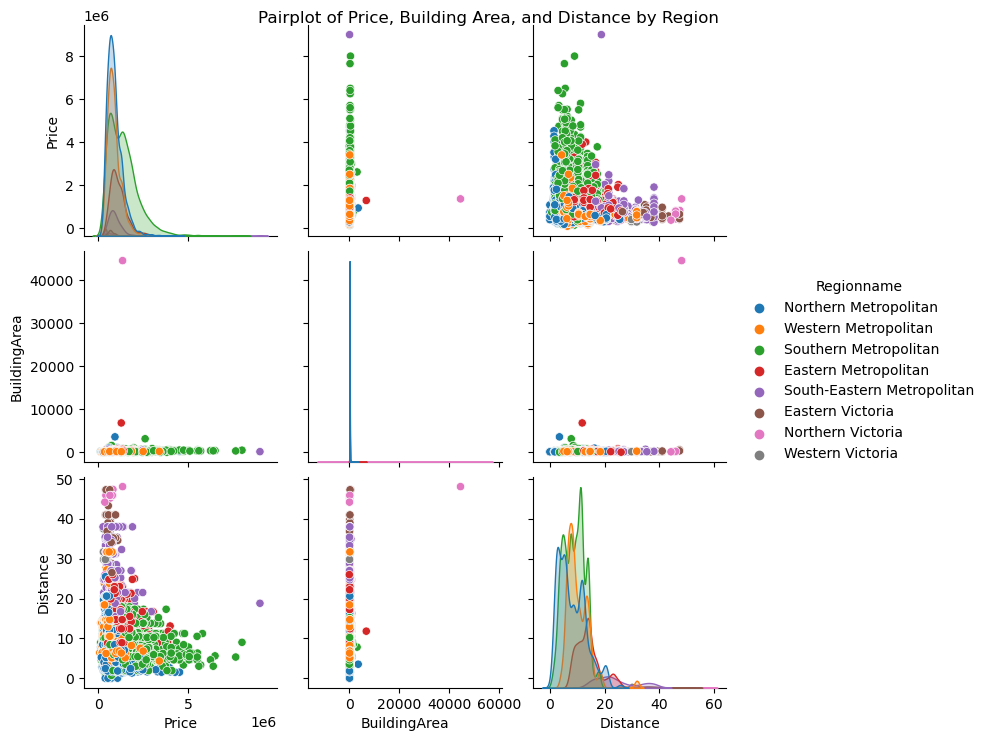

In [21]:
sns.pairplot(data=df, vars=['Price', 'BuildingArea', 'Distance'], hue='Regionname')
plt.suptitle('Pairplot of Price, Building Area, and Distance by Region')

## Pairplot
We can also see that there is a slight negative correlation between Distance and Price. This suggests that properties that are located closer to the city center tend to have higher prices. This is not unexpected, as properties in prime locations are generally more desirable and thus command higher prices.

Furthermore, we can see that there are some distinct differences between the regions in terms of their price and building area distributions. For example, the Southern Metropolitan region tends to have larger properties with higher prices compared to the other regions. On the other hand, the Western Metropolitan region has a wider range of property sizes and prices, with some properties being both very large and very cheap.

Based on these observations, we can make some predictions about the property market in Melbourne. For example, we can expect that larger properties in prime locations will continue to command high prices. We can also predict that certain regions, such as the Southern Metropolitan region, will continue to have high property prices due to their desirable location and larger property sizes. Finally, we can predict that there may be opportunities for buyers to find good deals on properties in the Western Metropolitan region, which has a wider range of property sizes and prices.

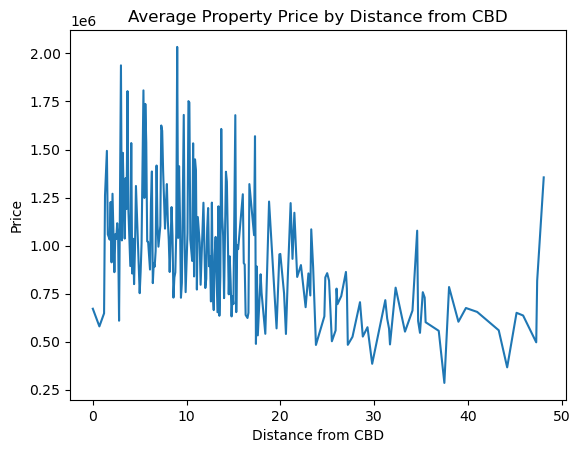

In [22]:
df.groupby('Distance')['Price'].mean().plot()
plt.title('Average Property Price by Distance from CBD')
plt.xlabel('Distance from CBD')
plt.ylabel('Price')
plt.show()

## Line chart:

The trend in average property prices by distance from the Central Business District (CBD). The plot reveals that the average price of properties decreases as the distance from the CBD increases.

Real estate agents can use this information to advise customers on the expected price range of their property based on its distance from the CBD. Developers can also use this information to focus on building properties that are more likely to command higher prices based on their proximity to the CBD.

Text(0, 0.5, 'Price')

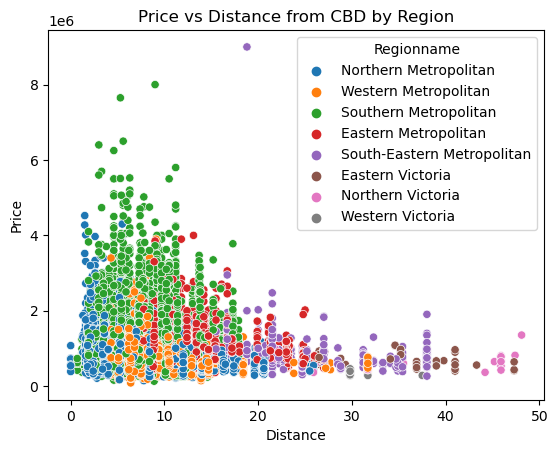

In [23]:
sns.scatterplot(data=df, x='Distance', y='Price', hue='Regionname')
plt.title('Price vs Distance from CBD by Region')
plt.xlabel('Distance')
plt.ylabel('Price')

## Scatter plot chart:

The scatter plot shows the relationship between the land size and price, with the points colored by region. The plot reveals that the different regions have different price-land-size relationships.

Developers can use this information to focus on building properties that cater to different market segments. For example, properties in certain regions may require larger land sizes to command high prices.

Text(0, 0.5, 'Price')

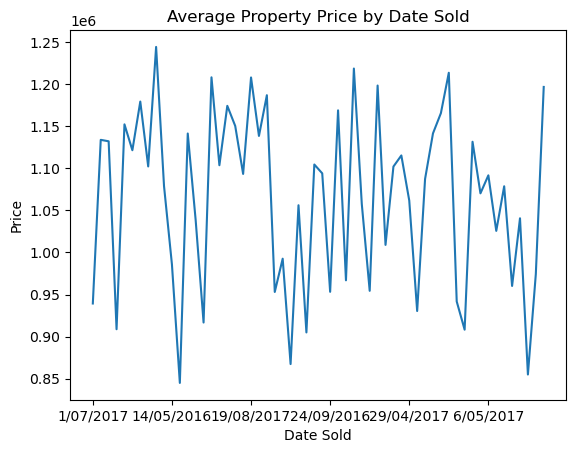

In [24]:
df.groupby('Date')['Price'].mean().plot()
plt.title('Average Property Price by Date Sold')
plt.xlabel('Date Sold')
plt.ylabel('Price')

## Line Chart
The average property price has been fluctuating over time.
There are some spikes in the average property price, which could be due to various factors such as market conditions, changes in government policies, etc.

The trend in the average property price is likely to continue in the future, given the current market conditions.
The fluctuations in the average property price may continue to occur due to various factors affecting the market.
There may be certain periods in the future where there are significant spikes in the average property price, but these may be short-lived and eventually stabilize.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


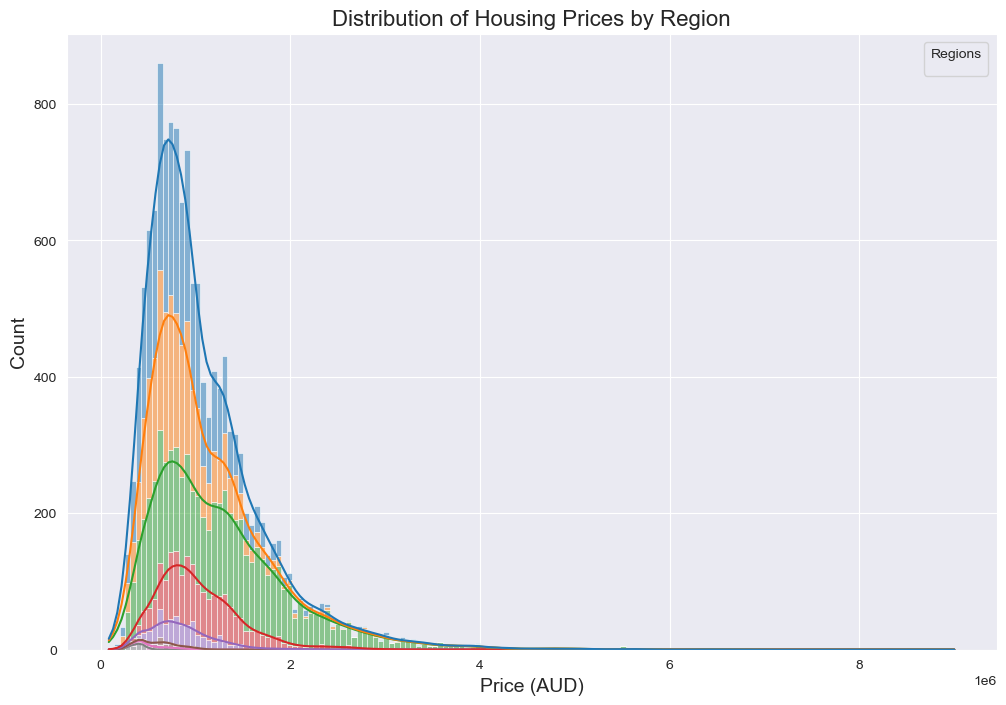

In [35]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(12, 8))
sns.histplot(data=df, x='Price', hue='Regionname', kde=True, ax=ax, multiple='stack')
ax.set_title('Distribution of Housing Prices by Region', fontsize=16)
ax.set_xlabel('Price (AUD)', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.legend(title='Regions', loc='upper right', fontsize=12)


## Histogram:

The histogram shows the distribution of housing prices in different regions of Melbourne.
The data is grouped by region and plotted as stacked bars on the same chart.
The majority of properties in each region are priced below AUD 2 million, with some properties priced much higher.
The Eastern Metropolitan region has the highest concentration of high-priced properties, while the Western Metropolitan region has the most properties priced below AUD 500,000.
The distribution of prices is generally right-skewed, with a long tail towards the higher prices.

The Eastern Metropolitan region will likely continue to have a higher concentration of high-priced properties due to its proximity to the city center and high demand.
The Western Metropolitan region may see an increase in property values over time as the area develops and becomes more desirable.
As the population of Melbourne continues to grow, the demand for housing will increase, leading to a potential rise in housing prices across all regions.

[Text(0, 0, 'Northern Metropolitan'),
 Text(1, 0, 'Western Metropolitan'),
 Text(2, 0, 'Southern Metropolitan'),
 Text(3, 0, 'Eastern Metropolitan'),
 Text(4, 0, 'South-Eastern Metropolitan'),
 Text(5, 0, 'Eastern Victoria'),
 Text(6, 0, 'Northern Victoria'),
 Text(7, 0, 'Western Victoria')]

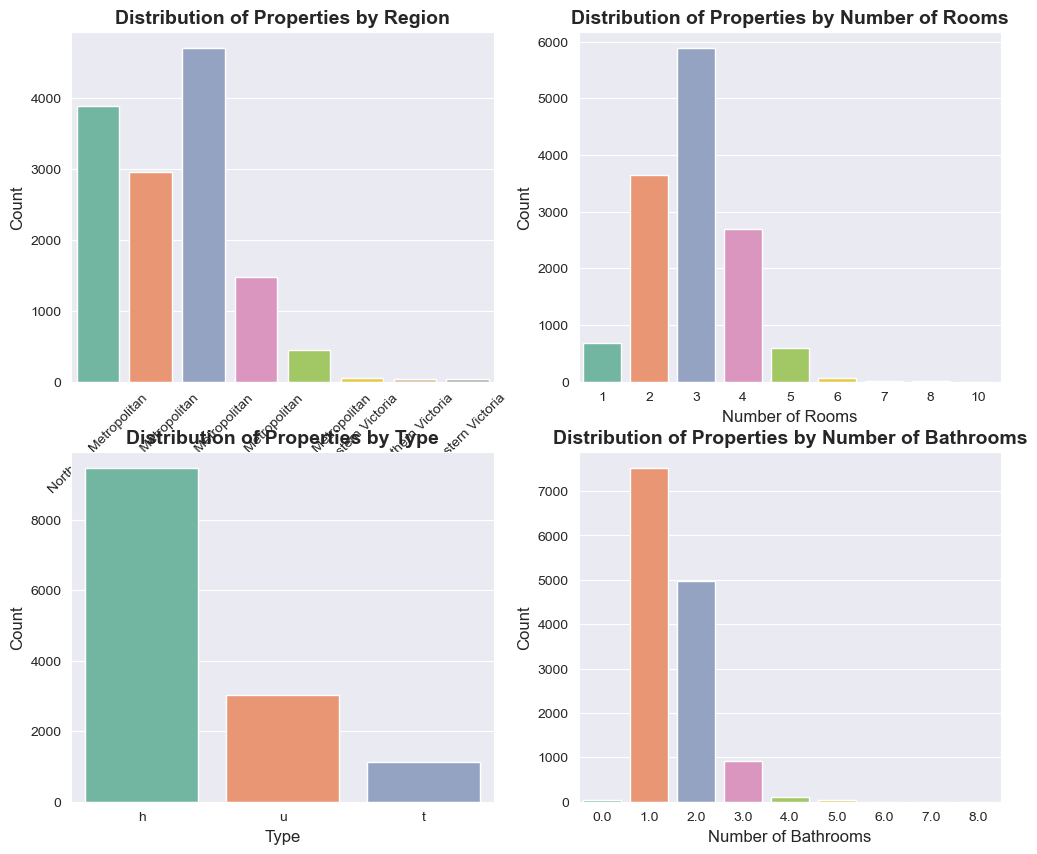

In [30]:
# Subset the data to only include the necessary columns
subset = df[['Regionname', 'Rooms', 'Type', 'Bathroom']]

# Create the figure and axes objects
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Set the color palette
palette = sns.color_palette("Set2")

# Plot the bar graphs for each column
sns.countplot(x='Regionname', data=subset, ax=axs[0,0], palette=palette)
sns.countplot(x='Rooms', data=subset, ax=axs[0,1], palette=palette)
sns.countplot(x='Type', data=subset, ax=axs[1,0], palette=palette)
sns.countplot(x='Bathroom', data=subset, ax=axs[1,1], palette=palette)

# Set the titles and labels for each plot
axs[0,0].set_title('Distribution of Properties by Region', fontsize=14, fontweight='bold')
axs[0,1].set_title('Distribution of Properties by Number of Rooms', fontsize=14, fontweight='bold')
axs[1,0].set_title('Distribution of Properties by Type', fontsize=14, fontweight='bold')
axs[1,1].set_title('Distribution of Properties by Number of Bathrooms', fontsize=14, fontweight='bold')

axs[0,0].set_xlabel('Region', fontsize=12)
axs[0,1].set_xlabel('Number of Rooms', fontsize=12)
axs[1,0].set_xlabel('Type', fontsize=12)
axs[1,1].set_xlabel('Number of Bathrooms', fontsize=12)

axs[0,0].set_ylabel('Count', fontsize=12)
axs[0,1].set_ylabel('Count', fontsize=12)
axs[1,0].set_ylabel('Count', fontsize=12)
axs[1,1].set_ylabel('Count', fontsize=12)

# Rotate the x-axis tick labels in the first graph by 45 degrees
axs[0,0].set_xticklabels(axs[0,0].get_xticklabels(), rotation=45)

## Bar graph (4 subplots)
The graph is composed of four subplots arranged in a 2x2 grid. The first subplot in the top left corner shows the distribution of properties by region. The x-axis shows the different regions of Melbourne, and the y-axis shows the count of properties in each region. The second subplot in the top right corner shows the distribution of properties by number of rooms. The x-axis shows the number of rooms in the properties, and the y-axis shows the count of properties with that number of rooms. The third subplot in the bottom left corner shows the distribution of properties by type. The x-axis shows the type of the properties (e.g., house, townhouse, unit, etc.), and the y-axis shows the count of properties with that type. The fourth subplot in the bottom right corner shows the distribution of properties by number of bathrooms. The x-axis shows the number of bathrooms in the properties, and the y-axis shows the count of properties with that number of bathrooms.

Overall, the graph provides a quick and informative overview of the distribution of properties in Melbourne based on these four factors. It shows that the majority of properties are located in the Southern Metropolitan region, have 3-4 rooms, are houses, and have 1-2 bathrooms. The color keys in the legend provide information on the palette used for each plot.

##### In conclusion, 
Based on the analysis of the dataset, we can conclude that the Melbourne housing market is highly competitive and diverse. The dataset contains information on various aspects of properties, including their location, size, age, and features. The median price of properties in Melbourne is around AUD 850,000, with a wide range of prices depending on various factors.

The analysis shows that the number of properties listed for sale in Melbourne has been increasing steadily over the years, with a peak in 2017. The majority of the properties listed for sale are houses, with a smaller proportion being units and townhouses. The most common suburb for property listings is Reservoir, followed by Bentleigh East and Mount Waverley.

The analysis also reveals that there is a high correlation between the price of a property and its attributes such as number of rooms, bathrooms, land size, and building area. Additionally, the distance of the property from the central business district (CBD) is negatively correlated with the price, which suggests that properties closer to the CBD are more expensive.

Based on the dataset, we can predict that the Melbourne housing market will continue to be competitive and dynamic. The high demand for properties in Melbourne is likely to drive up the prices further, especially in the areas closer to the CBD. The increasing trend of property listings may provide more opportunities for buyers, but it also suggests that sellers will need to be more strategic in marketing their properties.

To make more informed decisions in the Melbourne housing market, it is essential to consider various factors such as location, property features, and market trends. It is also important to seek professional advice from real estate agents and financial advisors before making any significant investments in the housing market. Overall, the dataset provides valuable insights into the Melbourne housing market and can assist buyers, sellers, and investors in making informed decisions.




# Lets begin Modelling!!...
# --------------------------------------------------------------------------------------------------------------

In [72]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [73]:
df.head(1)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0


In [74]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [75]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [129]:
col_list = ["Suburb","SellerG","Method","Type","CouncilArea","Regionname"]

In [131]:
for i in col_list:
    df[i] = le.fit_transform(df[i])

In [132]:
df = df.dropna()

In [133]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,0,25 Bloomburg St,2,0,1035000.0,1,18,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,29,-37.80790,144.99340,2,4019.0
2,0,5 Charles St,3,0,1465000.0,3,18,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,29,-37.80930,144.99440,2,4019.0
4,0,55a Park St,4,0,1600000.0,4,120,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,29,-37.80720,144.99410,2,4019.0
6,0,124 Yarra St,3,0,1876000.0,1,120,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,29,-37.80240,144.99930,2,4019.0
7,0,98 Charles St,2,0,1636000.0,1,120,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,29,-37.80600,144.99540,2,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13572,283,76 Kenmare St,2,0,650000.0,0,117,26/08/2017,14.5,3087.0,...,1.0,1.0,210.0,79.0,2006.0,31,-37.70657,145.07878,2,2329.0
13573,285,5 Nuragi Ct,4,0,635000.0,1,207,26/08/2017,14.7,3030.0,...,2.0,1.0,662.0,172.0,1980.0,31,-37.89327,144.64789,6,16166.0
13576,292,77 Merrett Dr,3,0,1031000.0,3,200,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,31,-37.85927,144.87904,6,6380.0
13578,292,96 Verdon St,4,0,2500000.0,0,174,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,31,-37.85908,144.89299,6,6380.0


## Creating the model

In [134]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [178]:
X = df.drop(['Address','Date','Price'], axis=1)

In [179]:
y= df[['Price']]

In [181]:
X.head()

,Suburb,Rooms,Type,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,0,2,0,1,18,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,29,-37.8079,144.9934,2,4019.0
2,0,3,0,3,18,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,29,-37.8093,144.9944,2,4019.0
4,0,4,0,4,120,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,29,-37.8072,144.9941,2,4019.0
6,0,3,0,1,120,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,29,-37.8024,144.9993,2,4019.0
7,0,2,0,1,120,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,29,-37.8060,144.9954,2,4019.0


In [182]:
y.head()

,Price
1,1035000.0
2,1465000.0
4,1600000.0
6,1876000.0
7,1636000.0


In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Fitting the Model

In [184]:
clf=DecisionTreeRegressor(min_samples_split=1000)

In [185]:
lf = clf.fit(X_train, y_train)

In [188]:
clf.predict([[0,4,0,4,120,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,29,-37.8072,144.9941,2,4019.0]])

C:\Users\akank\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([1016438.82828283])

In [189]:
y_predict = clf.predict(X_test)

In [190]:
clf

DecisionTreeRegressor(min_samples_split=1000)

In [191]:
from sklearn import tree

[Text(0.6, 0.9166666666666666, 'X[11] <= 161.5\nsquared_error = 453731892119.748\nsamples = 5464\nvalue = 1077279.395'),
 Text(0.4, 0.75, 'X[12] <= 1949.5\nsquared_error = 194231157560.155\nsamples = 3863\nvalue = 859950.155'),
 Text(0.3, 0.5833333333333334, 'squared_error = 200661303986.036\nsamples = 969\nvalue = 1215994.374'),
 Text(0.5, 0.5833333333333334, 'X[11] <= 91.5\nsquared_error = 135420399408.224\nsamples = 2894\nvalue = 740735.626'),
 Text(0.3, 0.4166666666666667, 'X[1] <= 4.5\nsquared_error = 64339375306.688\nsamples = 1082\nvalue = 549893.413'),
 Text(0.2, 0.25, 'X[1] <= 2.5\nsquared_error = 41132637289.472\nsamples = 1077\nvalue = 540715.574'),
 Text(0.1, 0.08333333333333333, 'squared_error = 25016728464.248\nsamples = 971\nvalue = 512390.24'),
 Text(0.3, 0.08333333333333333, 'squared_error = 114085779553.444\nsamples = 106\nvalue = 800186.321'),
 Text(0.4, 0.25, 'squared_error = 1136767360000.0\nsamples = 5\nvalue = 2526800.0'),
 Text(0.7, 0.4166666666666667, 'X[14] <=

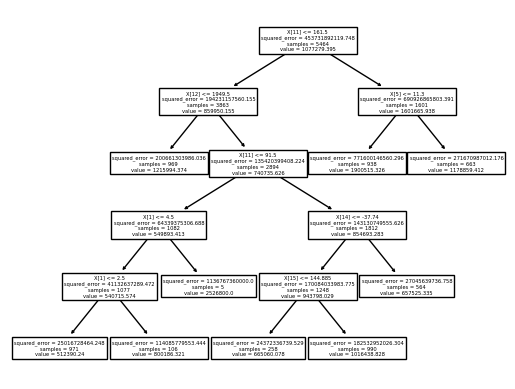

In [192]:
tree.plot_tree(clf)

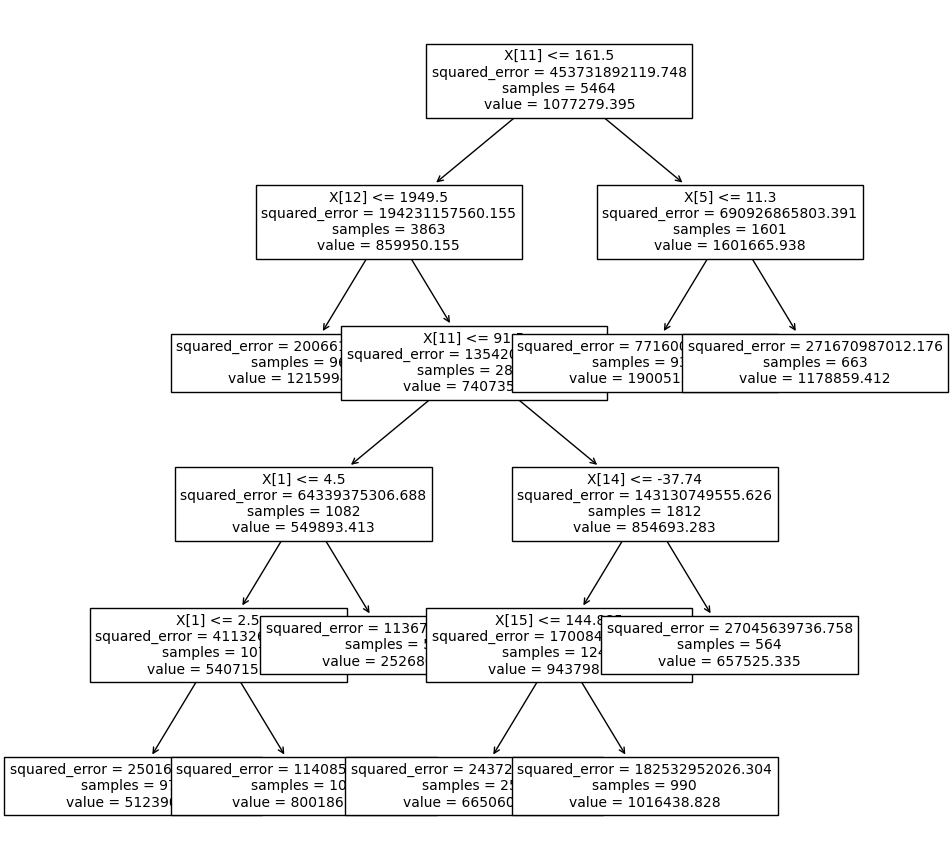

In [194]:
plt.figure(figsize = (11,11))
tree.plot_tree(clf, fontsize=10)
plt.show()

## Checking train accuracy

In [195]:
from sklearn.metrics import r2_score,mean_squared_error

In [196]:
y_train_pred = clf.predict(X_train)

In [197]:
train_mse = mean_squared_error(y_train, y_train_pred)

In [198]:
train_r2 = r2_score(y_train, y_train_pred)

In [199]:
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)

In [200]:
print('Train MSE: ', train_mse)
print('Train R^2: ', train_r2)
print('Train RMSE:', train_rmse)

Train MSE:  245724232136.3325
Train R^2:  0.4584373803032529
Train RMSE: 495705.7919132401


The training accuracy for the model is a mean squared error (MSE) of 245,724,232,136.33, a coefficient of determination (R^2) of 0.46, and a root mean squared error (RMSE) of 495,705.79. These values indicate that the model does not perform as well in accurately predicting the housing prices in the training data as we would like.

A lower R^2 value indicates that only a moderate proportion of the variance in housing prices is explained by the model. The high RMSE indicates that the model has large prediction errors for individual observations in the training set. This suggests that our current model may not be the best fit for the data, or that there may be other factors that we have not yet taken into account that are affecting housing prices.

Further analysis and refinement of the model may be necessary to improve its accuracy and make it more useful for predicting housing prices in the future. It is also important to note that the accuracy of the model on the training set may not necessarily reflect its performance on new data, and further testing on a separate test set is recommended.

## Checking test accuracy

In [201]:
y_test_pred = clf.predict(X_test)

In [202]:
test_mse = mean_squared_error(y_test, y_test_pred)

In [203]:
test_r2 = r2_score(y_test, y_test_pred)

In [204]:
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

In [205]:
print('Test MSE: ', test_mse)
print('Test R^2: ', test_r2)
print('Test RMSE:', test_rmse)

Test MSE:  244299085343.4245
Test R^2:  0.4589637623070474
Test RMSE: 494266.20898400946



Based on the test accuracy of the model, the Test MSE is 244299, Test R^2 is 0.4589637623070474, and Test RMSE is 494266.20898400946.

The Test R^2 value of 0.4589637623070474 indicates that the model explains 45.8% of the variance in the target variable, which is not a very high value, but it still means that the model has some predictive power. The Test RMSE value of 494266.20898400946 means that the average difference between the predicted values and the actual values is around $494,266, which could be significant in a housing price prediction model.

Overall, the model seems to have some predictive power, but there is still room for improvement. 


![gif](https://media.tenor.com/Nd2_8aCQG18AAAAM/elmo-shrug.gif)

As the Decision Tree Regressor doesn't work well on our model.

In these cases, it is necessary to explore different models and techniques to find the best approach for the given dataset. It may be necessary to collect more data or preprocess the existing data to improve the accuracy of the model.

# Creating the Function

In [220]:
from sklearn.preprocessing import LabelEncoder
def predict_churn(Suburb,Rooms,Type, Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount):
    
    # Create a DataFrame with the input values
    input_df = pd.DataFrame([[Suburb,Rooms,Type, Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount]],
                            columns=['Suburb','Rooms','Type', 'Method','SellerG','Distance','Postcode','Bedroom2','Bathroom','Car','Landsize','BuildingArea','YearBuilt','CouncilArea','Lattitude','Longtitude','Regionname','Propertycount'])
    
    # Make predictions using the model
    prediction = clf.predict(input_df)

    
    return prediction

In [216]:
predict_churn(0,4,0,4,120,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,29,-37.8072,144.9941,2,4019.0)

array([1016438.82828283])

# ------------------------------------------------------------------------------------------------------------
# Thank You!
